# Correlation between 4th Grade Test Scores and Other Variables

In this lab, I will analyze a data set containing the average test scores of 4th graders at various schools and other variables, and will find the variables most correlated with the average test of 4th graders across all schools.  

## Finding the Pearson R Correlation Coefficient

In [1]:
%matplotlib inline
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import scipy.stats

data_file = open("MCAS.csv","r")
data_list = []
for ii in data_file:
    data_list.append(ii)
del data_list[0];

#all the elements in the data file, in the order they appear (left to right)
dist_code = [] 
municipal = []
dist_name = []
comb_score_4 = [] #scores are math + eng + sci
comb_score_8 = []
reg_day_spend = [] #all spending is per day
spec_need_spend = []
biling_spend = []
occup_therapy_spend = []
total_spend = []
stud_teach = [] #students per teacher
stud_computer = [] #students per computer
spec_ed = [] #% special ed students
free_lunch = [] #%eligilbe for reduced price lunch
avg_salary = [] #avg teacher salary
income = [] # per capita income
eng_learn = [] #% english learners

for jj in range(len(data_list)): 
    data_list[jj] = data_list[jj].replace("\n", "");
    data_list[jj] = data_list[jj].split(",");
    dist_code.append(float(data_list[jj][1]))
    municipal.append(data_list[jj][2])
    dist_name.append(data_list[jj][3])
    reg_day_spend.append(float(data_list[jj][4]))
    spec_need_spend.append(float(data_list[jj][5]))
    biling_spend.append(float(data_list[jj][6]))
    occup_therapy_spend.append(float(data_list[jj][7]))
    total_spend.append(float(data_list[jj][8]))
    
    try: 
        #if there is an NA, then put 0 for the value
        stud_computer.append(float(data_list[jj][9]))
    except:
        stud_computer.append(0.0)
        
    spec_ed.append(float(data_list[jj][10]))
    free_lunch.append(float(data_list[jj][11]))
    stud_teach.append(float(data_list[jj][12]))
    income.append(float(data_list[jj][13]))
    
    try:
        #if there is an NA, put 0 for the value
        comb_score_4.append(float(data_list[jj][14]))
    except: 
        comb_score_4.append(0.0)
        
    try:
        #if there is an NA, put 0 for the value
        comb_score_8.append(float(data_list[jj][15]))
    except: 
        comb_score_8.append(0.0)
        
    try: 
        #if there is NA, put 0 for the value
        avg_salary.append(float(data_list[jj][16]))
    except: 
        avg_salary.append(0.0)
        
    eng_learn.append(float(data_list[jj][17]))
    
    #list.remove(0) and make a loop: while list.contain(0)

    
big_list = [reg_day_spend, spec_need_spend, biling_spend, occup_therapy_spend, total_spend, 
            stud_computer, spec_ed, free_lunch, stud_teach, income, comb_score_4, comb_score_8, 
            avg_salary, eng_learn]

big_list_str = ["reg_day_spend", "spec_need_spend", "biling_spend", "occup_therapy_spend", "total_spend", 
            "stud_computer", "spec_ed", "free_lunch", "stud_teach", "income", "comb_score_4", "comb_score_8", 
            "avg_salary", "eng_learn"]
pearson_r = [] #array to store pearson correlation coefficient
element_1 = [] #array to store what the first input array was to the pearson r function (as str)
element_2 = [] #array to store what the first input array was to the pearson r function (as str)

    
for kk in range(len(big_list)):
    for ll in range(len(big_list)):
        if kk != ll:
            pearson_r.append(scipy.stats.pearsonr(big_list[kk],big_list[ll])[0])
            element_1.append(big_list_str[kk])
            element_2.append(big_list_str[ll])


#removing N/A values (previously changed to 0) for 4th grade scores and 8th grade scores
comb_score_4_removed = []
comb_score_8_removed = []
for pp in range (len(comb_score_8)):
    if comb_score_8[pp] != 0:
        comb_score_4_removed.append(comb_score_4[pp])
        comb_score_8_removed.append(comb_score_8[pp])


#removing N/A values (previously changed to 0) for 4th grade scores and average salary
comb_score_4_removed2 = []
avg_salary_removed = []
for qq in range (len(comb_score_8)):
    if avg_salary[qq] != 0:
        comb_score_4_removed2.append(comb_score_4[qq])
        avg_salary_removed.append(avg_salary[qq])
        
#removing N/A values (previously changed to 0) for 4th grade scores and student computer ratio
comb_score_4_removed3 = []
stud_computer_removed = []
for rr in range (len(comb_score_8)):
    if stud_computer[rr] != 0:
        comb_score_4_removed3.append(comb_score_4[rr])
        stud_computer_removed.append(avg_salary[rr])
        
r_input = [] #stores correlation coefficients of all variables compared
r_input_4 = [] #stores correlation coefficients of 4th scores compared w other variables
for mm in range(len(pearson_r)):
    tuple1 = (element_1[mm], element_2[mm], pearson_r[mm])
    r_input.append(tuple1)
    if element_1[mm] == "comb_score_4":
        r_input_4.append(tuple1)
        
#manually adding the scores with the N/As removed
r_input.append(("comb_score_4_removed", "comb_score_8_removed", scipy.stats.pearsonr(comb_score_4_removed, comb_score_8_removed)[0]))
r_input_4.append(("comb_score_4_removed", "comb_score_8_removed", scipy.stats.pearsonr(comb_score_4_removed, comb_score_8_removed)[0]))
   
r_input.append(("comb_score_4_removed2", "avg_salary_removed", scipy.stats.pearsonr(comb_score_4_removed2, avg_salary_removed)[0]))
r_input_4.append(("comb_score_4_removed2", "avg_salary_removed", scipy.stats.pearsonr(comb_score_4_removed2, avg_salary_removed)[0]))

r_input.append(("comb_score_4_removed3", "stud_computer_removed", scipy.stats.pearsonr(comb_score_4_removed3, stud_computer_removed)[0]))
r_input_4.append(("comb_score_4_removed3", "stud_computer_removed", scipy.stats.pearsonr(comb_score_4_removed3, stud_computer_removed)[0]))


sort_r_input = []
sort_r_input_4 = []
#sort the r value and inputs by negative absolute value of pearson r
sort_r_input = sorted(r_input, key=lambda s: -abs(s[2])) 
#sort the r value and inputs of 4th ONLY by negative absolute value of pearson r
sort_r_input_4 = sorted(r_input_4, key=lambda s: -abs(s[2]))


#print greatest pearson r values 
print("Variables Most Correlated and their Pearson R Correlation Coefficient\n")
print(sort_r_input[0][0],"\t\t", sort_r_input[0][1],"\t\t", sort_r_input[0][2]) 
print(sort_r_input[2][0],"\t", sort_r_input[2][1],"\t", sort_r_input[2][2])
print(sort_r_input[3][0],"\t\t", sort_r_input[3][1],"\t\t", sort_r_input[3][2]) 
#NOTE the numbers not counting up directly is because most variable pairs had pearson r calculated twice, except for 2 pairs

print("\n")

print("Variables Most Correlated with 4th Grade Test Scores and their Pearson R \nCorrelation Coefficient\n")
#print greatest pearson r values correlated with 4th grade ONLY
print(sort_r_input_4[0][0],"\t", sort_r_input_4[0][1],"\t", sort_r_input_4[0][2])
print(sort_r_input_4[1][0],"\t\t", sort_r_input_4[1][1],"\t\t", sort_r_input_4[1][2]) 
print(sort_r_input_4[2][0],"\t\t", sort_r_input_4[2][1],"\t\t", sort_r_input_4[2][2]) 


Variables Most Correlated and their Pearson R Correlation Coefficient

reg_day_spend 		 total_spend 		 0.965985747698
comb_score_4_removed 	 comb_score_8_removed 	 0.859350539611
free_lunch 		 comb_score_4 		 -0.78418370215


Variables Most Correlated with 4th Grade Test Scores and their Pearson R 
Correlation Coefficient

comb_score_4_removed 	 comb_score_8_removed 	 0.859350539611
comb_score_4 		 free_lunch 		 -0.78418370215
comb_score_4 		 income 		 0.623420563566


Comparing all variables, I found that the most correlated variables are:
1. Average spending on a regular pupil per day, and average spending on all pupils per day   (R = 0.966)
2. Combined score of 4th graders, and the combined score of 8th graders (N/As removed)
(R = 0.859)
3. Percentage of students who get free lunch, and the combined score of 4th graders
(R = -0.784)


Note: The extremely high correlation coefficient in 1 can be explained by the fact the only difference between the two variables is the whether special needs students are included in the average of the total student body, but excluded from the average of the regular (non-special needs) student body. Because regular students outnumber special needs students by a large margin, the inclusion of spending on special needs students in the mean does not affect the mean very much, even if spending each special needs student is significantly greater than spending on each regular student. 

The variables most correlated with the combined score of 4th graders (anchor variable) are:
1. Combined score of eighth graders (after removing N/As) 
(R = 0.859)
2. Percentage of students who get free lunch
(R = -0.784)
3. Average income
(R = 0.623)


## Graphs of 4th Grade Scores and Most Correlated Variables 

income free_lunch -0.562663593929


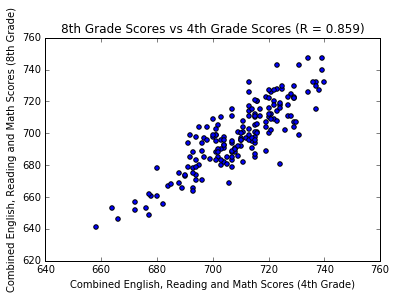

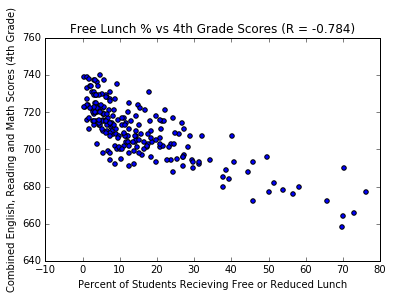

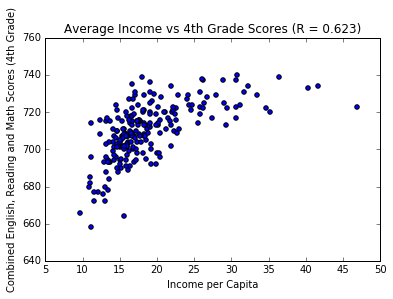

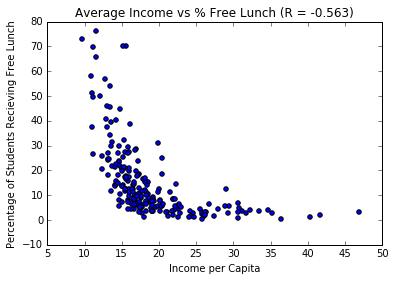

In [2]:
#eight grade vs 4th grade
plt.scatter(comb_score_4_removed, comb_score_8_removed)
plt.xlabel("Combined English, Reading and Math Scores (4th Grade)")
plt.ylabel("Combined English, Reading and Math Scores (8th Grade)")
plt.title("8th Grade Scores vs 4th Grade Scores (R = 0.859)")

#free lunch vs score of 4th graders
secondPlot = plt.figure()
ax2 = secondPlot.add_subplot(111)
ax2.scatter(free_lunch, comb_score_4) #most negatively correlated
plt.xlabel("Percent of Students Recieving Free or Reduced Lunch")
plt.ylabel("Combined English, Reading and Math Scores (4th Grade)")
plt.title("Free Lunch % vs 4th Grade Scores (R = -0.784)")

#income vs score of 4th graders
secondPlot = plt.figure()
ax2 = secondPlot.add_subplot(111)
ax2.scatter(income, comb_score_4) #second most positively correlated
plt.xlabel("Income per Capita")
plt.ylabel("Combined English, Reading and Math Scores (4th Grade)")
plt.title("Average Income vs 4th Grade Scores (R = 0.623)")

print("income", "free_lunch", scipy.stats.pearsonr(income, free_lunch)[0])

secondPlot = plt.figure()
ax2 = secondPlot.add_subplot(111)
ax2.scatter(income, free_lunch) #second most positively correlated
plt.xlabel("Income per Capita")
plt.ylabel("Percentage of Students Recieving Free Lunch")
plt.title("Average Income vs % Free Lunch (R = -0.563)")

## Conclusion